# Content and Objective

+ Show characteristics of allpass and minimum phase systems
+ Show that mp systems "spend their energy earliest possible"

# Importing and Plotting Options

In [1]:
# importing
import numpy as np

from scipy import signal

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 10) )

# Analyze Minimum Phase System

In [3]:
# first system being minimum phase
# define zeros and poles and get transfer function
zeros = np.array( [ 0, 0, 0 ] )
poles = np.array( [ .5, .25+.8j, .25-.8j ] )
num, denom = signal.zpk2tf( zeros, poles, 1 )

# get impulse response of the system
n_o, h = signal.dimpulse( [ num, denom, 1 ] )
h = np.squeeze( np.array( h ) )

# freq. range and freq. response
freqs = np.linspace( -np.pi, np.pi, 512 )    
w, H = signal.freqz( num, denom, worN=freqs, whole=True )    
H = np.squeeze( np.array( H ) )    

# Adding Allpass Part

In [4]:
# add all-pass part and find all parameters of this second system
poles_add = np.array( [ -.3+.4j, -.3-.4j, -.8, -.1+.7j, -.1-.7j ], dtype=complex )
zeros_add = 1 / poles_add.conj()

zeros_2 = np.append( zeros, zeros_add )    
poles_2 = np.append( poles, poles_add )
num_2, denom_2 = signal.zpk2tf( zeros_2, poles_2, 1 )    

# get impulse response of the second system
n_o_2, h_2 = signal.dimpulse( [ num_2, denom_2, 1 ])
h_2 = np.squeeze( np.array( h_2 ) )

# freq. range and freq. response
w_2, H_2 = signal.freqz( num_2, denom_2, worN=freqs, whole=True )    
H_2 = np.squeeze( np.array( H_2 ) ) 

# Plotting

__main__:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
__main__:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0, 0.5, '$\\phi_2(\\Omega)$')

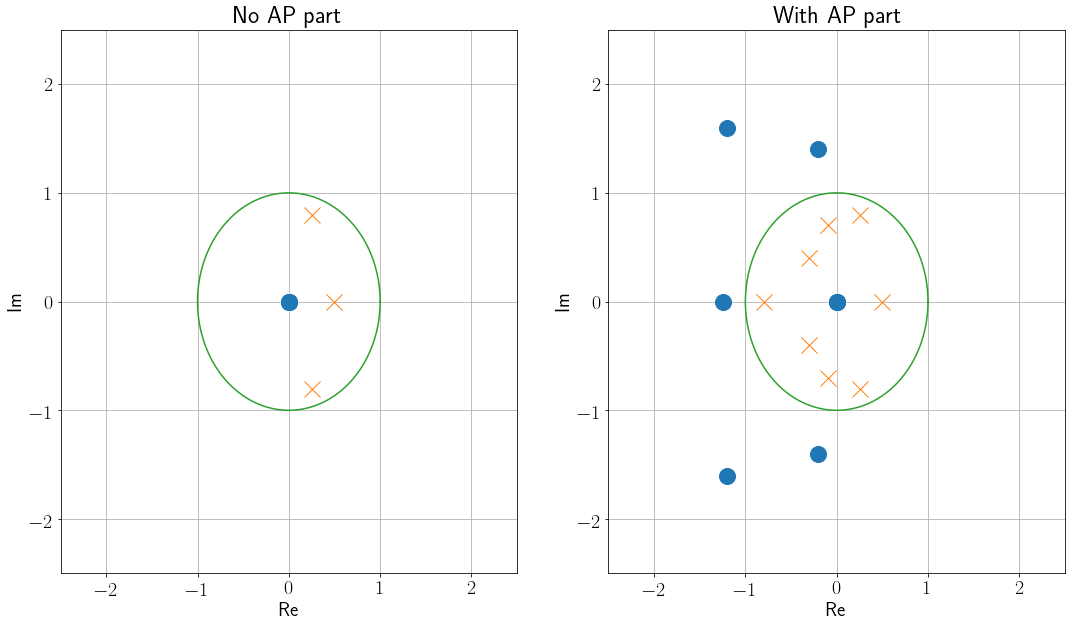

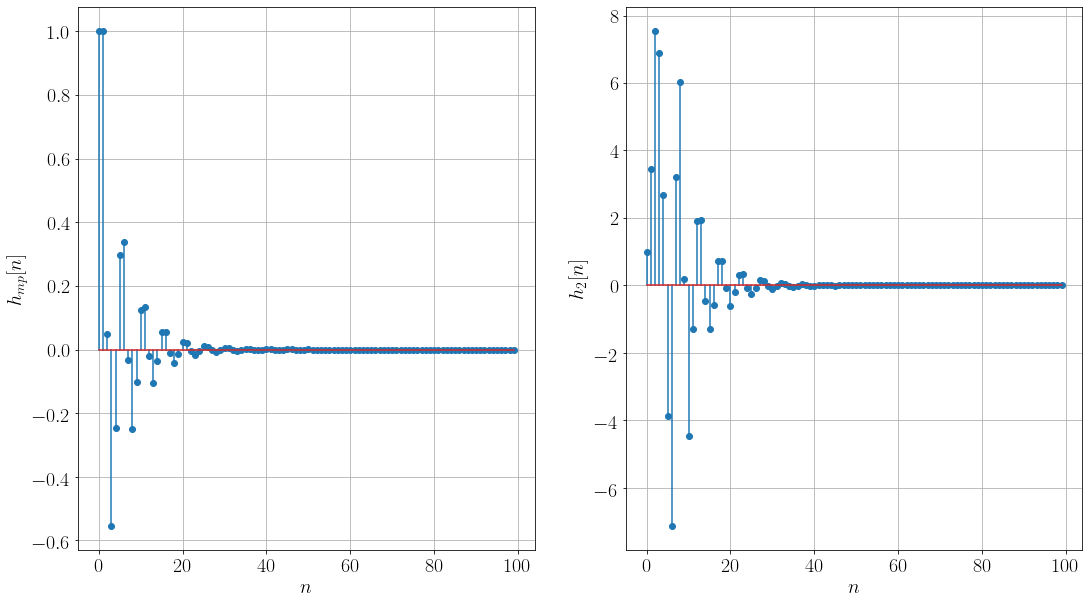

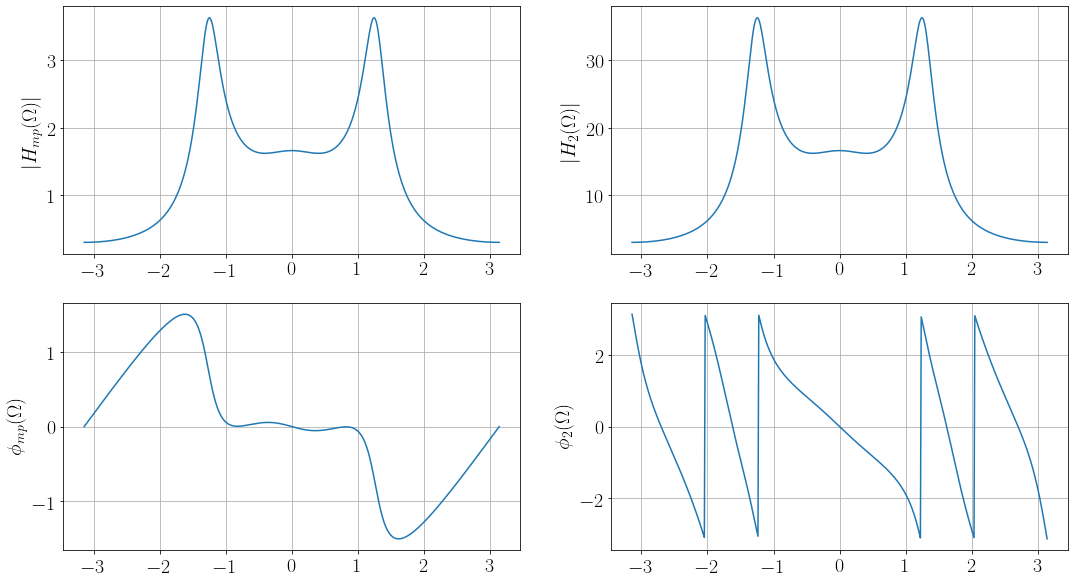

In [5]:
###
# poles and zeros
###
plt.figure()

plt.subplot(121)
plt.title('No AP part')

plt.plot( np.real( zeros ), np.imag( zeros ), 'o', markersize=16)
plt.plot( np.real( poles ), np.imag( poles ), 'x', markersize=16)

phi = np.linspace(0, 2*np.pi, 256)
unit_circle = np.exp(1j*phi)
plt.plot( np.real( unit_circle ) , np.imag( unit_circle ) )

plt.grid( True )
plt.xlabel('Re')
plt.ylabel('Im')
plt.xlim( ( -2.5, 2.5 ) ) 
plt.ylim( ( -2.5, 2.5 ) )

plt.subplot(122)
plt.title('With AP part')

plt.plot( np.real( zeros_2 ), np.imag( zeros_2 ), 'o', markersize=16)
plt.plot( np.real( poles_2 ), np.imag( poles_2 ), 'x', markersize=16)

phi = np.linspace(0, 2*np.pi, 256)
unit_circle = np.exp(1j*phi)
plt.plot( np.real( unit_circle ) , np.imag( unit_circle ) )

plt.grid( True )
plt.xlabel('Re')
plt.ylabel('Im')
plt.xlim( ( -2.5, 2.5 ) ) 
plt.ylim( ( -2.5, 2.5 ) )


###
# impulse responses
###
plt.figure() 

plt.subplot(121)
plt.stem(n_o, h.real)#, n_o, h.imag, 'o')
#plt.axis([-.1, 30.1, -.1, 1.1])
plt.grid(True)        
plt.xlabel('$n$')
plt.ylabel('$h_{mp}[n]$')

plt.subplot(122)
plt.stem(n_o_2, h_2.real)#, n_o, h.imag, 'o')
#plt.axis([-.1, 30.1, -.1, 1.1])
plt.grid(True)        
plt.xlabel('$n$')
plt.ylabel('$h_2[n]$')  


###
# frequency responses
###

plt.figure()    

plt.subplot(221)
plt.plot(freqs, abs(H))
plt.grid(True)
#plt.axis([-np.pi-.1, np.pi+.1, -.1, 5.1])
#plt.xlabel('$\Omega$')
plt.ylabel('$|H_{mp}(\Omega)|$')

plt.subplot(223)    
plt.plot(freqs, np.angle(H))
plt.grid(True)
#plt.axis([-np.pi-.1, np.pi+.1, -.1, 5.1])
#plt.xlabel('$\Omega$')
plt.ylabel('$\phi_{mp}(\Omega)$')    


plt.subplot(222)
plt.plot(freqs, abs(H_2))
plt.grid(True)
#plt.axis([-np.pi-.1, np.pi+.1, -.1, 5.1])
#plt.xlabel('$\Omega$')
plt.ylabel('$|H_2(\Omega)|$')

plt.subplot(224)    
plt.plot(freqs, np.angle(H_2))
plt.grid(True)
#plt.axis([-np.pi-.1, np.pi+.1, -.1, 5.1])
#plt.xlabel('$\Omega$')
plt.ylabel('$\phi_2(\Omega)$') 
    

**Note:** Energy of the impulse responses is not normalized, so that ampltudes are different.

### Now Showing the Energy is Spent Earlier

(-1, 40)

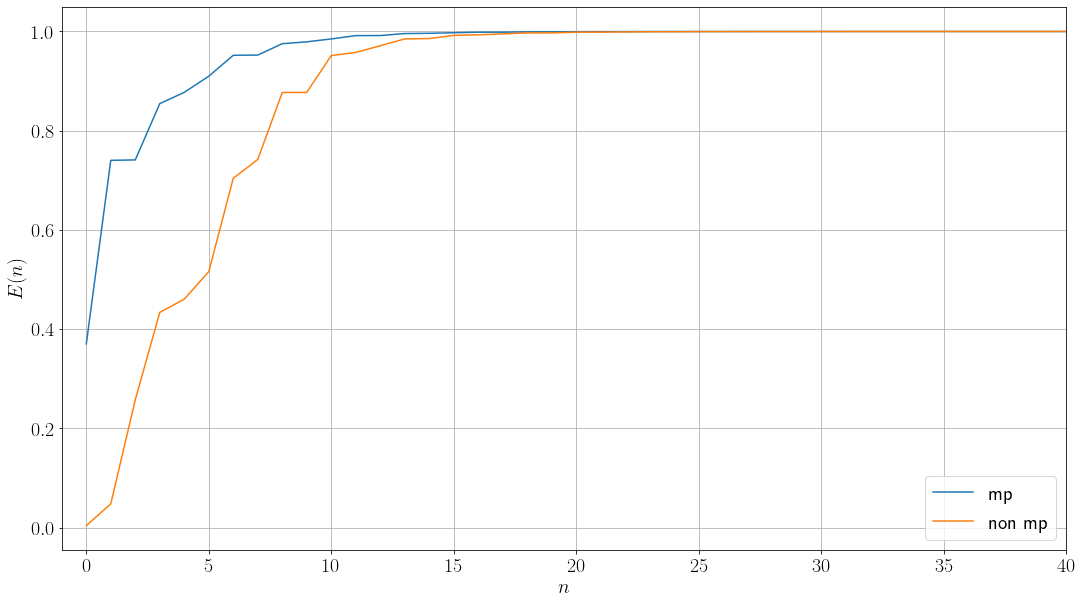

In [6]:
# partial energy of the 2 systems
E_h = np.cumsum( abs(h)**2 / np.linalg.norm( h )**2 )
E_h_2 = np.cumsum( abs(h_2)**2 / np.linalg.norm( h_2 )**2 ) 

plt.figure()

plt.plot(n_o, E_h, label='mp')
plt.plot(n_o, E_h_2, label='non mp')

plt.legend()
plt.grid(True)
plt.xlabel('$n$')
plt.ylabel('$E(n)$') 
plt.xlim( ( -1, 40 ) )